In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from keras.utils import np_utils

# Новый раздел

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
# from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy import optimize
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

In [ ]:
df = shuffle(pd.read_csv('A_Z Handwritten Data.csv'), n_samples=10000)
# df_noize = pd.read_csv('out.csv')

In [ ]:
df_noize = shuffle(pd.read_csv('out.csv'), n_samples=10000)

In [ ]:
word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

In [ ]:
X = df.drop('0',axis = 1)
y = df['0']
X_n = df_noize.drop('0',axis = 1)
y_n = df_noize['0']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

In [ ]:
y_nn = y_n.replace(255, 25)

In [ ]:
x_n_train, x_n_test, y_n_train, y_n_test = train_test_split(X_n, y_nn, test_size = 0.01)

In [ ]:
xx_n_train = []
for x in range(len(x_n_train)):
  xx_n_train.append(np.array(x_n_train.iloc[x][1:]).reshape(28, 28))

In [ ]:
xx_n_train = np.array(xx_n_train)

15


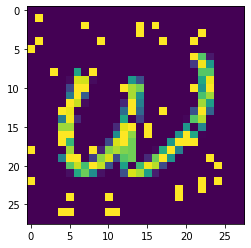

In [ ]:
plt.imshow(xx_n_train[0])
print(np.array(y_n)[0])

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data:", x_train.shape)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data:", x_test.shape)

New shape of train data: (8000, 28, 28, 1)
New shape of test data: (2000, 28, 28, 1)


In [ ]:
x_n_train = xx_n_train.reshape(xx_n_train.shape[0], xx_n_train.shape[1], xx_n_train.shape[2], 1)
print("New shape of train data:", x_n_train.shape)

New shape of train data: (9900, 28, 28, 1)


In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
y_n_train = np_utils.to_categorical(y_n_train)

In [ ]:
x_train.shape

(8000, 28, 28, 1)

In [ ]:
x_n_train.shape

(9900, 28, 28, 1)

In [ ]:
y_n_train.shape

(9900, 26)

In [ ]:
y_train.shape

(8000, 26)

In [ ]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model1.add(Flatten())
model1.add(Dense(128,activation ="relu"))
model1.add(Dense(26,activation ="softmax"))

In [ ]:
 model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 128)               2769024   
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                                 
Total params: 2,772,698
Trainable params: 2,772,698
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.fit(xx_n_train, y_n_train, epochs=50, batch_size = 100)

Epoch 1/50
99/99 [==============================] - 10s 99ms/step - loss: 0.8422 - accuracy: 0.7241
Epoch 2/50
99/99 [==============================] - 7s 73ms/step - loss: 0.7995 - accuracy: 0.7343
Epoch 3/50
99/99 [==============================] - 7s 73ms/step - loss: 0.7559 - accuracy: 0.7504
Epoch 4/50
99/99 [==============================] - 7s 73ms/step - loss: 0.7235 - accuracy: 0.7596
Epoch 5/50
99/99 [==============================] - 7s 73ms/step - loss: 0.7115 - accuracy: 0.7640
Epoch 6/50
99/99 [==============================] - 7s 73ms/step - loss: 0.6848 - accuracy: 0.7701
Epoch 7/50
99/99 [==============================] - 7s 73ms/step - loss: 0.7162 - accuracy: 0.7670
Epoch 8/50
99/99 [==============================] - 7s 74ms/step - loss: 0.6941 - accuracy: 0.7702
Epoch 9/50
99/99 [==============================] - 7s 74ms/step - loss: 0.6392 - accuracy: 0.7912
Epoch 10/50
99/99 [==============================] - 7s 74ms/step - loss: 0.6375 - accuracy: 0.7894
Epoch 11

In [ ]:
model1.evaluate(xx_n_train, y_n_train)

310/310 [==============================] - 3s 10ms/step - loss: 0.3888 - accuracy: 0.8843


[0.38876843452453613, 0.8843434453010559]

In [ ]:
model1.evaluate(x_train, y_train)

250/250 [==============================] - 3s 11ms/step - loss: 3.2393 - accuracy: 0.6395


[3.2393088340759277, 0.6395000219345093]